# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob

# Parameters

In [2]:
m = 9.10938356e-31
e = 1.60217662e-19
c = 299792458
epsilon = 8.85e-12

def getEr(lambd):
    w = 2 * 3.14159 * c / lambd
    return m * w * c / e

In [3]:
lambd = 1e-6
FACTOR = 7
Er = getEr(lambd)
omega0 = 2*np.pi*3e8/lambd
tau = 2*np.pi/omega0
T = 20*tau
T_MAX = 15*tau
nc = epsilon*m*omega0**2/e**2
n0 = FACTOR*nc
Er, omega0, tau, T, T_MAX

(3210698360819.1753,
 1884955592153876.0,
 3.3333333333333332e-15,
 6.666666666666667e-14,
 4.9999999999999995e-14)

In [4]:
omega_max = 20*omega0
f_max = omega_max/(2*np.pi)
dt_min = 1/(2*f_max)
dt_min*1e15

0.08333333333333333

In [5]:
dt = 0.08e-15
f_max = 1/dt
omega_max = 2*np.pi*f_max
omega_max/omega0

41.666666666666664

In [6]:
all_files = glob.glob("data/*sdf")
len(all_files)

627

In [7]:
X = np.linspace(-4, 4, 8000)
T = np.linspace(0, T_MAX, len(all_files))

## Plots

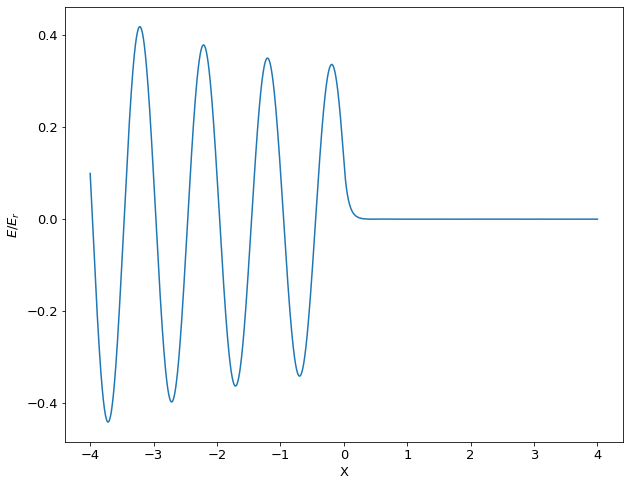

In [8]:
data = sdf.read(all_files[300])
plt.plot(X, data.Electric_Field_Ey.data/Er)
plt.xlabel("X")
plt.ylabel("$E/E_r$");

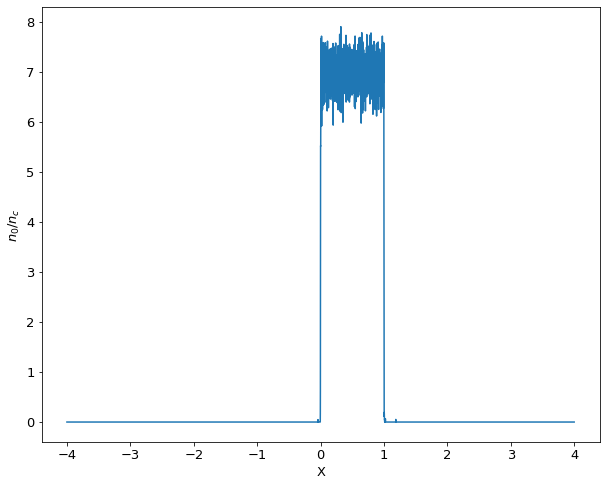

In [9]:
plt.plot(X, data.Derived_Number_Density_Electron.data/nc)
plt.xlabel("X")
plt.ylabel("$n_0/n_c$");

In [10]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field


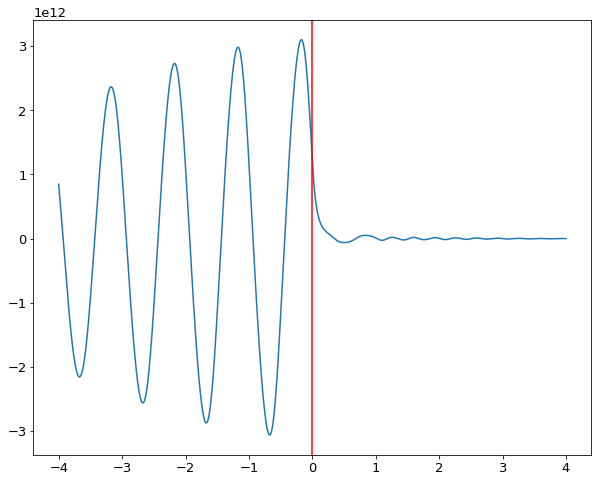

In [11]:
Ey = get_field(500)
plt.plot(X, Ey)
plt.axvline(0, color="red")
plt.show()


In [15]:
all_files.sort()

In [17]:
Et1 = np.zeros(len(all_files))
Et2 = np.zeros(len(all_files))
d = np.zeros((len(all_files), 8000))
for i in range(len(all_files)):
    data = sdf.read(all_files[i])
    ey = data.Electric_Field_Ey.data
    Et1[i] = ey[3000]
    Et2[i] = ey[6500]
    d[i] = data.Derived_Number_Density_Electron.data


In [18]:
# d = np.array(d)/n0
# Et1 = np.array(Et1)
# Et2 = np.array(Et2)
d.shape, Et1.shape, Et2.shape

((627, 8000), (627,), (627,))

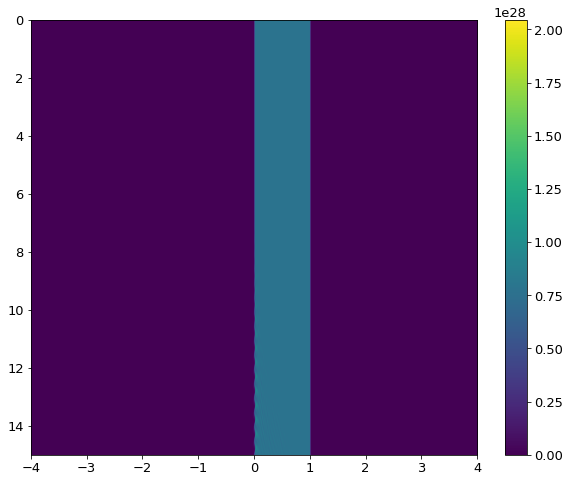

In [19]:
EXTENT = [-4,4,15,0]
plt.imshow(d, aspect="auto", extent=EXTENT)
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

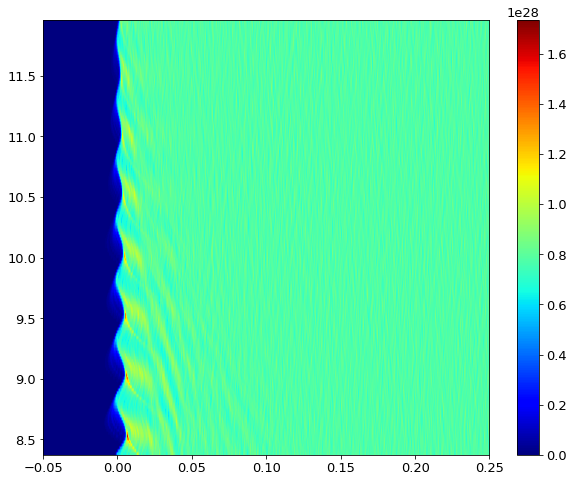

In [20]:
t_start = 350
t_end = 500
t_max = d.shape[0]
x_max = d.shape[1]
x_start = 3900
x_end = 4500
EXTENT = [4*(x_start-4000)/x_max,4*(x_end-4000)/x_max,15*t_start/t_max,15*t_end/t_max]
plt.imshow(d[t_start:t_end, x_start:x_end], aspect="auto", extent=EXTENT, cmap="jet")
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

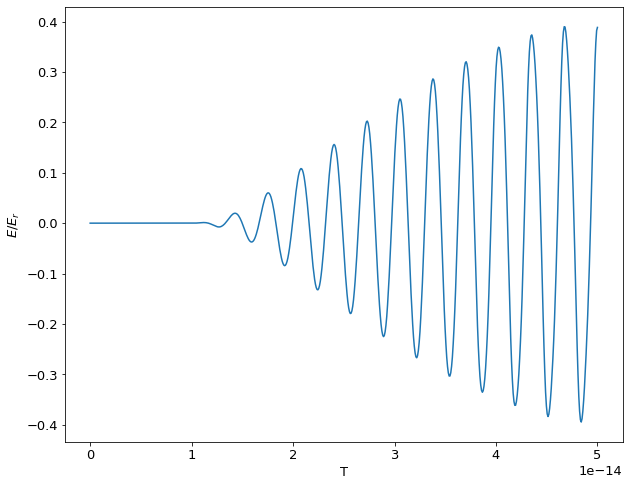

In [21]:
plt.plot(T, Et1/Er)
plt.xlabel("T")
plt.ylabel("$E/E_r$");

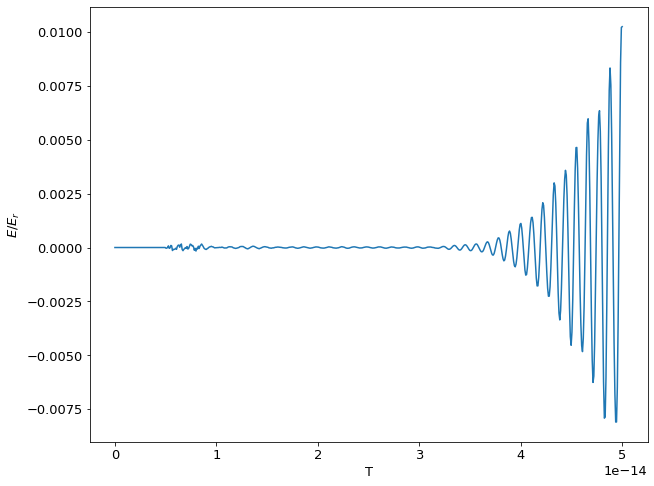

In [22]:
plt.plot(T, Et2/Er)
plt.xlabel("T")
plt.ylabel("$E/E_r$");

## FT

In [23]:
y1 = np.fft.fft(Et1)
y2 = np.fft.fft(Et2)

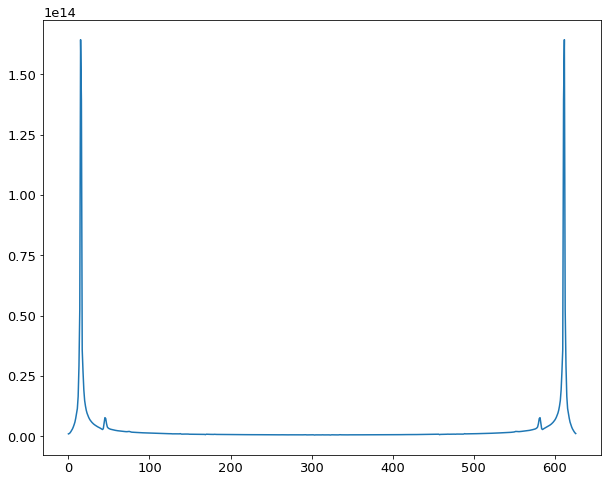

In [24]:
plt.plot(np.abs(y1));

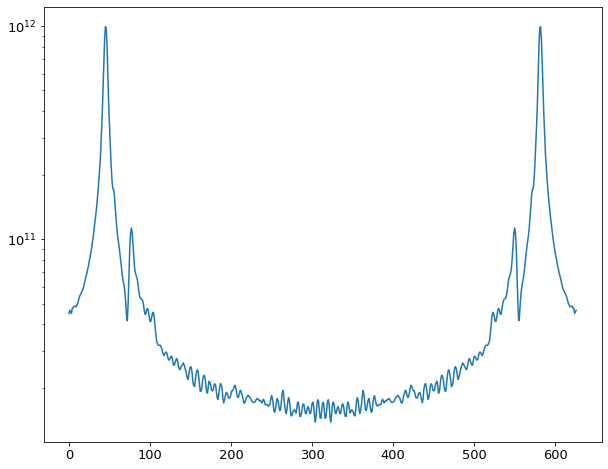

In [25]:
plt.plot(np.abs(y2))
plt.yscale("log")

In [27]:
y1_shift = np.fft.fftshift(y1)
y2_shift = np.fft.fftshift(y2)
y1_f = np.abs(y1_shift)/Er
y2_f = np.abs(y2_shift)/Er

In [28]:
omega = np.linspace(-omega_max/2, omega_max/2, len(all_files))

In [29]:
omega_max/omega0

41.666666666666664

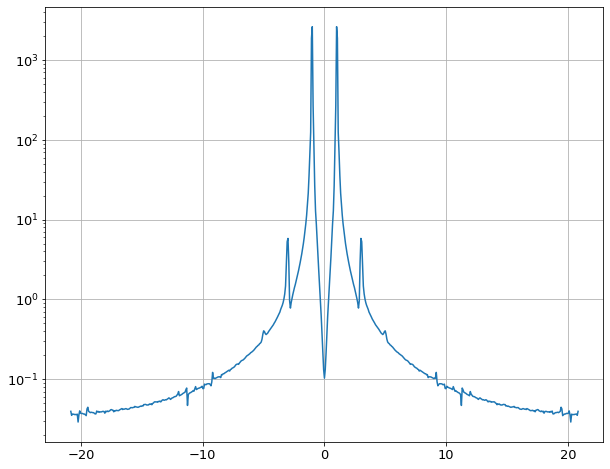

In [30]:
plt.plot(omega/omega0, y1_f**2)
plt.yscale("log")
plt.grid()

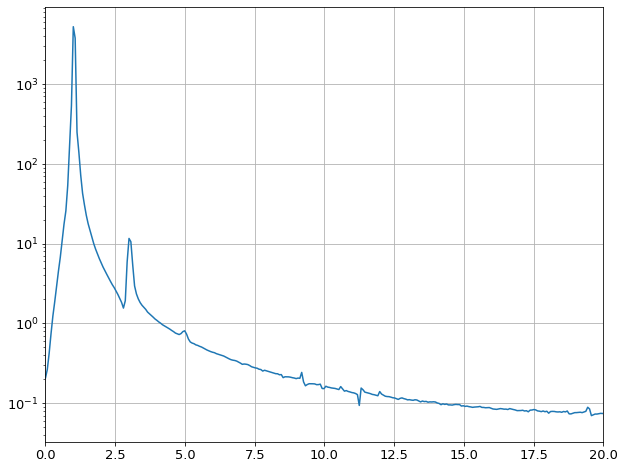

In [31]:
plt.plot(omega/omega0, 2*y1_f**2)
plt.yscale("log")
plt.xlim(0,20)
plt.grid()

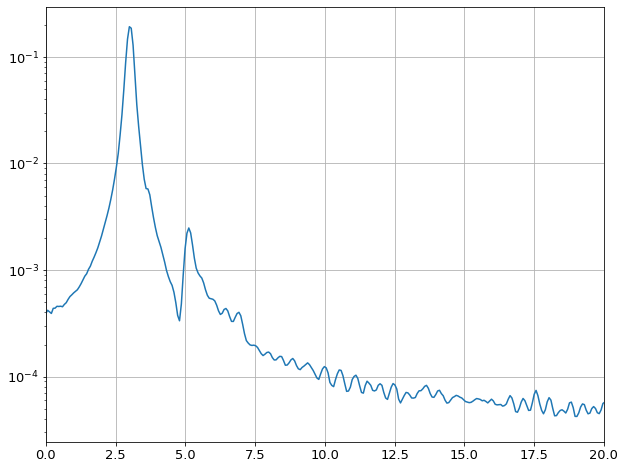

In [32]:
plt.plot(omega/omega0, 2*y2_f**2)
plt.yscale("log")
plt.xlim(0,20)
plt.grid()